# Prepare the data

In [225]:
import pandas as pd

data = pd.read_csv('./organisations.csv')
features = pd.read_csv('./features.csv')
rubrics = pd.read_csv('./rubrics.csv')

The data contains some binary features of different eating places along with the average bill

In [226]:
data

,org_id,city,average_bill,rating,rubrics_id,features_id
0,15903868628669802651,msk,1500.0,4.270968,30776 30774,3501685156 3501779478 20422 3502045016 3502045...
1,16076540698036998306,msk,500.0,4.375000,30771,1509 1082283206 273469383 10462 11617 35017794...
2,8129364761615040323,msk,500.0,4.000000,31495,10462 11177 11617 11629 1416 1018 11704 11867 ...
3,15262729117594253452,msk,500.0,4.538813,30776 30770,3501618484 2020795524 11629 11617 1018 11704 2...
4,13418544315327784420,msk,500.0,4.409091,31495,11617 10462 11177 1416 11867 3501744275 20282 ...
...,...,...,...,...,...,...
68334,4379286080707082909,msk,NaN,3.812500,30774,1018 1415 10462 11629 11867 20422 20424 118949...
68335,7916477189329738565,msk,NaN,4.894231,30776,11634 11629 3501481353 11177 3501773763 11867 ...
68336,12358902585434046825,msk,NaN,4.156250,30774,20422 11867 246 3501754799 3501779478 12048 35...
68337,1712093598996183140,spb,NaN,NaN,30771 30774,3491142672 3501481353 11867 20422 273469383 11...


Let's look at the kinds of eating places and their features using the human readable mapping:

In [227]:
rubric_dict = {str(x['rubric_id']): x['rubric_name'] for x in rubrics[['rubric_id', 'rubric_name']].to_dict(orient='records')}
feature_dict = {str(x['feature_id']): x['feature_name'] for x in features.to_dict(orient='records')}

In [228]:
rubric_dict

{'30519': 'Булочная, пекарня',
 '30770': 'Бар, паб',
 '30771': 'Быстрое питание',
 '30774': 'Кафе',
 '30775': 'Пиццерия',
 '30776': 'Ресторан',
 '30777': 'Столовая',
 '31286': 'Спортбар',
 '31350': 'Кондитерская',
 '31375': 'Суши-бар',
 '31401': 'Кальян-бар',
 '31495': 'Кофейня',
 '3108292683': 'Бар безалкогольных напитков',
 '3501514558': 'Фудкорт',
 '3501750896': 'Кофе с собой'}

In [229]:
feature_dict

{'1': 'prepress_and_post_printing_processing',
 '40': 'products',
 '54': 'printing_method',
 '77': 'fuel',
 '79': 'shop',
 '82': 'last_minute_deals_only',
 '104': 'tour_type',
 '110': 'audio_guide',
 '111': 'cargo_transportation',
 '113': 'manufacturing',
 '114': 'installation',
 '115': 'repairs',
 '116': 'production',
 '117': 'sale',
 '133': 'music_genre',
 '135': 'electroniccigarette',
 '137': 'variety_food',
 '140': 'room_disabled',
 '175': 'arts',
 '246': 'karaoke',
 '249': 'street_theatre',
 '253': 'performance',
 '256': 'vip_zone',
 '270': 'money_transfers',
 '275': 'loans_private_individuals',
 '282': 'sober_driver',
 '288': 'accepted_credit_cards',
 '305': 'refrigerator',
 '308': 'minibar',
 '312': 'room_number',
 '328': 'speciality',
 '337': 'type_of_rooms',
 '344': 'building_repair',
 '349': 'hospital_profile',
 '354': 'type_parking',
 '372': 'services_corporate_clients',
 '379': 'currency_exchange',
 '392': 'debit_cards',
 '402': 'improving_driver_qualifications',
 '405': 'f

We will try to extract some rules to find the restaurant's pricing category

In [230]:
data.shape, data.average_bill.isna().sum()

((68339, 6), 35561)

In [231]:
data['average_bill'].value_counts()

500.0       22329
1000.0       5482
1500.0       2696
2000.0       1184
2500.0        445
            ...  
18500.0         1
117000.0        1
30000.0         1
203500.0        1
101500.0        1
Name: average_bill, Length: 63, dtype: int64

As seen here, the data is a bit dirty: it contains a lot of NaN values and some unlikely large average bill values. Let's remove such entries.

In [232]:
data = data[~data['average_bill'].isna()]
data = data[data['average_bill'] <= 10000]
data.shape

(32720, 6)

Let's convert the binary features to one hot vectors:

In [233]:
data['rubrics_id'] = data['rubrics_id'].str.split(' ')
data['features_id'] = data['features_id'].str.split(' ')
data.head()

,org_id,city,average_bill,rating,rubrics_id,features_id
0,15903868628669802651,msk,1500.0,4.270968,"[30776, 30774]","[3501685156, 3501779478, 20422, 3502045016, 35..."
1,16076540698036998306,msk,500.0,4.375000,[30771],"[1509, 1082283206, 273469383, 10462, 11617, 35..."
2,8129364761615040323,msk,500.0,4.000000,[31495],"[10462, 11177, 11617, 11629, 1416, 1018, 11704..."
3,15262729117594253452,msk,500.0,4.538813,"[30776, 30770]","[3501618484, 2020795524, 11629, 11617, 1018, 1..."
4,13418544315327784420,msk,500.0,4.409091,[31495],"[11617, 10462, 11177, 1416, 11867, 3501744275,..."


In [234]:
for rubric_id in rubric_dict.keys():
  rubric_col = data['rubrics_id'].apply(lambda x: rubric_id in x)
  data[f'rubric_{rubric_id}'] = rubric_col

In [235]:
for feature_id in feature_dict.keys():
  feature_col = data['features_id'].apply(lambda x: feature_id in x)
  data[f'feature_{feature_id}'] = feature_col

<ipython-input-235-38e3a5842030>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'feature_{feature_id}'] = feature_col


In [236]:
import numpy as np

cities = pd.get_dummies(data['city'], dtype=bool)
data = pd.concat([data, cities], axis=1)

Now all the rows in the dataset are binarized. As seen earlier, the lowest and the most common average bill value is 500 roubles. Let's consider all the eating places with such an average bill 'cheap' and try to find out if we can deduce whether a restaurant is a cheap place to eat at using fca.

In [237]:
y = data['average_bill'] > 500
X = data.drop(['org_id', 'city', 'average_bill', 'rubrics_id', 'features_id', 'rating', 'average_bill'], axis=1)

In [238]:
X.head()

,rubric_30519,rubric_30770,rubric_30771,rubric_30774,rubric_30775,rubric_30776,rubric_30777,rubric_31286,rubric_31350,rubric_31375,...,feature_3502046337,feature_3502046339,feature_3502047434,feature_3502053162,feature_3502060253,feature_3502063466,feature_3502071401,feature_3502071402,msk,spb
0,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


We will remove all columns with the same values, since leaving them just adds unnecessary computing time:

In [239]:
excessive_columns = []
for col in X.columns:
  if len(X[col].unique()) == 1:
    excessive_columns.append(col)

In [240]:
len(excessive_columns)

375

In [241]:
X = X.drop(excessive_columns, axis=1)
X

,rubric_30519,rubric_30770,rubric_30771,rubric_30774,rubric_30775,rubric_30776,rubric_30777,rubric_31286,rubric_31350,rubric_31375,...,feature_3502046294,feature_3502046330,feature_3502046337,feature_3502046339,feature_3502060253,feature_3502063466,feature_3502071401,feature_3502071402,msk,spb
0,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68328,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
68329,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
68330,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
68331,False,True,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


Even with all the optimizations, the algorithm runs for quite some time with this dataset, so we will clip it to 2000 objects in a stratified fashion:

In [242]:
from sklearn.model_selection import train_test_split

X, _, y, _= train_test_split(X, y, train_size=2000, stratify=y, shuffle=True, random_state=0)

In [243]:
X.shape, y.shape

((2000, 648), (2000,))

Assume that at the very begining, we know the labels only for the first 20% of rows.

In [244]:
n_train = int(len(X)*0.2)
n_test = len(X) - n_train
n_train, n_test

(400, 1600)

# Make predictions

In [245]:
import time
from tqdm import tqdm

def predict_with_generators(
        x, X_train, Y_train,
        min_cardinality=1
):
    X_pos = X_train[Y_train]
    X_neg = X_train[~Y_train]

    intersections_pos = x.reshape(1, -1) & X_pos
    intersections_pos = intersections_pos[intersections_pos.sum(axis=1) >= min_cardinality]
    n_counters_pos = ((intersections_pos @ (~X_neg.T)) == 0).sum()

    intersections_neg = x.reshape(1, -1) & X_neg
    intersections_neg = intersections_neg[intersections_neg.sum(axis=1) >= min_cardinality]
    n_counters_neg = ((intersections_neg @ (~X_pos.T)) == 0).sum()

    perc_counters_pos = n_counters_pos / len(X_pos)
    perc_counters_neg = n_counters_neg / len(X_neg)

    prediction = perc_counters_pos < perc_counters_neg
    return prediction


def predict_array(
        X, Y,
        n_train, update_train=True, use_tqdm=False,
        predict_func=predict_with_generators
):
    for i, x in tqdm(
        X[n_train:].iterrows(),
        initial=n_train, total=len(X),
        desc='Predicting step by step',
        disable=not use_tqdm,
    ):
        n_trains = n_train + i if update_train else n_train
        yield predict_func(x.values, X[:n_trains].values, Y[:n_trains].values, min_cardinality=10)


def apply_stopwatch(iterator):
    """Measure run time of each iteration of ``iterator``
    The function can be applied e.g. for the output of ``predict_array`` function
    """
    outputs = []
    times = []

    t_start = time.time()
    for out in iterator:
        dt = time.time() - t_start
        outputs.append(out)
        times.append(dt)
        t_start = time.time()

    return outputs, times

Make predictions and measure time required to obtain these predictions

In [246]:
%%time
gen = predict_array(X, y, n_train, use_tqdm=True)
y_preds, t_preds = apply_stopwatch(gen)

Predicting step by step: 100%|██████████| 2000/2000 [03:22<00:00,  7.88it/s]

CPU times: user 3min 21s, sys: 819 ms, total: 3min 22s
Wall time: 3min 22s


In [247]:
%%time
gen = list(predict_array(X, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = apply_stopwatch(gen)

Predicting step by step: 100%|██████████| 2000/2000 [00:10<00:00, 146.32it/s]

CPU times: user 10.9 s, sys: 53 ms, total: 11 s
Wall time: 10.9 s


Evaluate predictions

Since we predict the final labels and not the class probability, using precision, recall and f1 score should be enough to estimate the algorithm's performance

In [254]:
from sklearn.metrics import f1_score, precision_score, recall_score

score_vals = {}
for score_f in [f1_score, precision_score, recall_score]:
    score_name = score_f.__name__
    preds = y_preds
    score_vals[score_name] = [score_f(y[:i], preds[:i], zero_division=0) for i in range(1, len(preds))]
    
    score_name = score_f.__name__ + '_fixedtrain'
    preds = y_preds_fixedtrain
    score_vals[score_name] = [score_f(y[:i], preds[:i], zero_division=0) for i in range(1, len(preds))]

# Analyze results

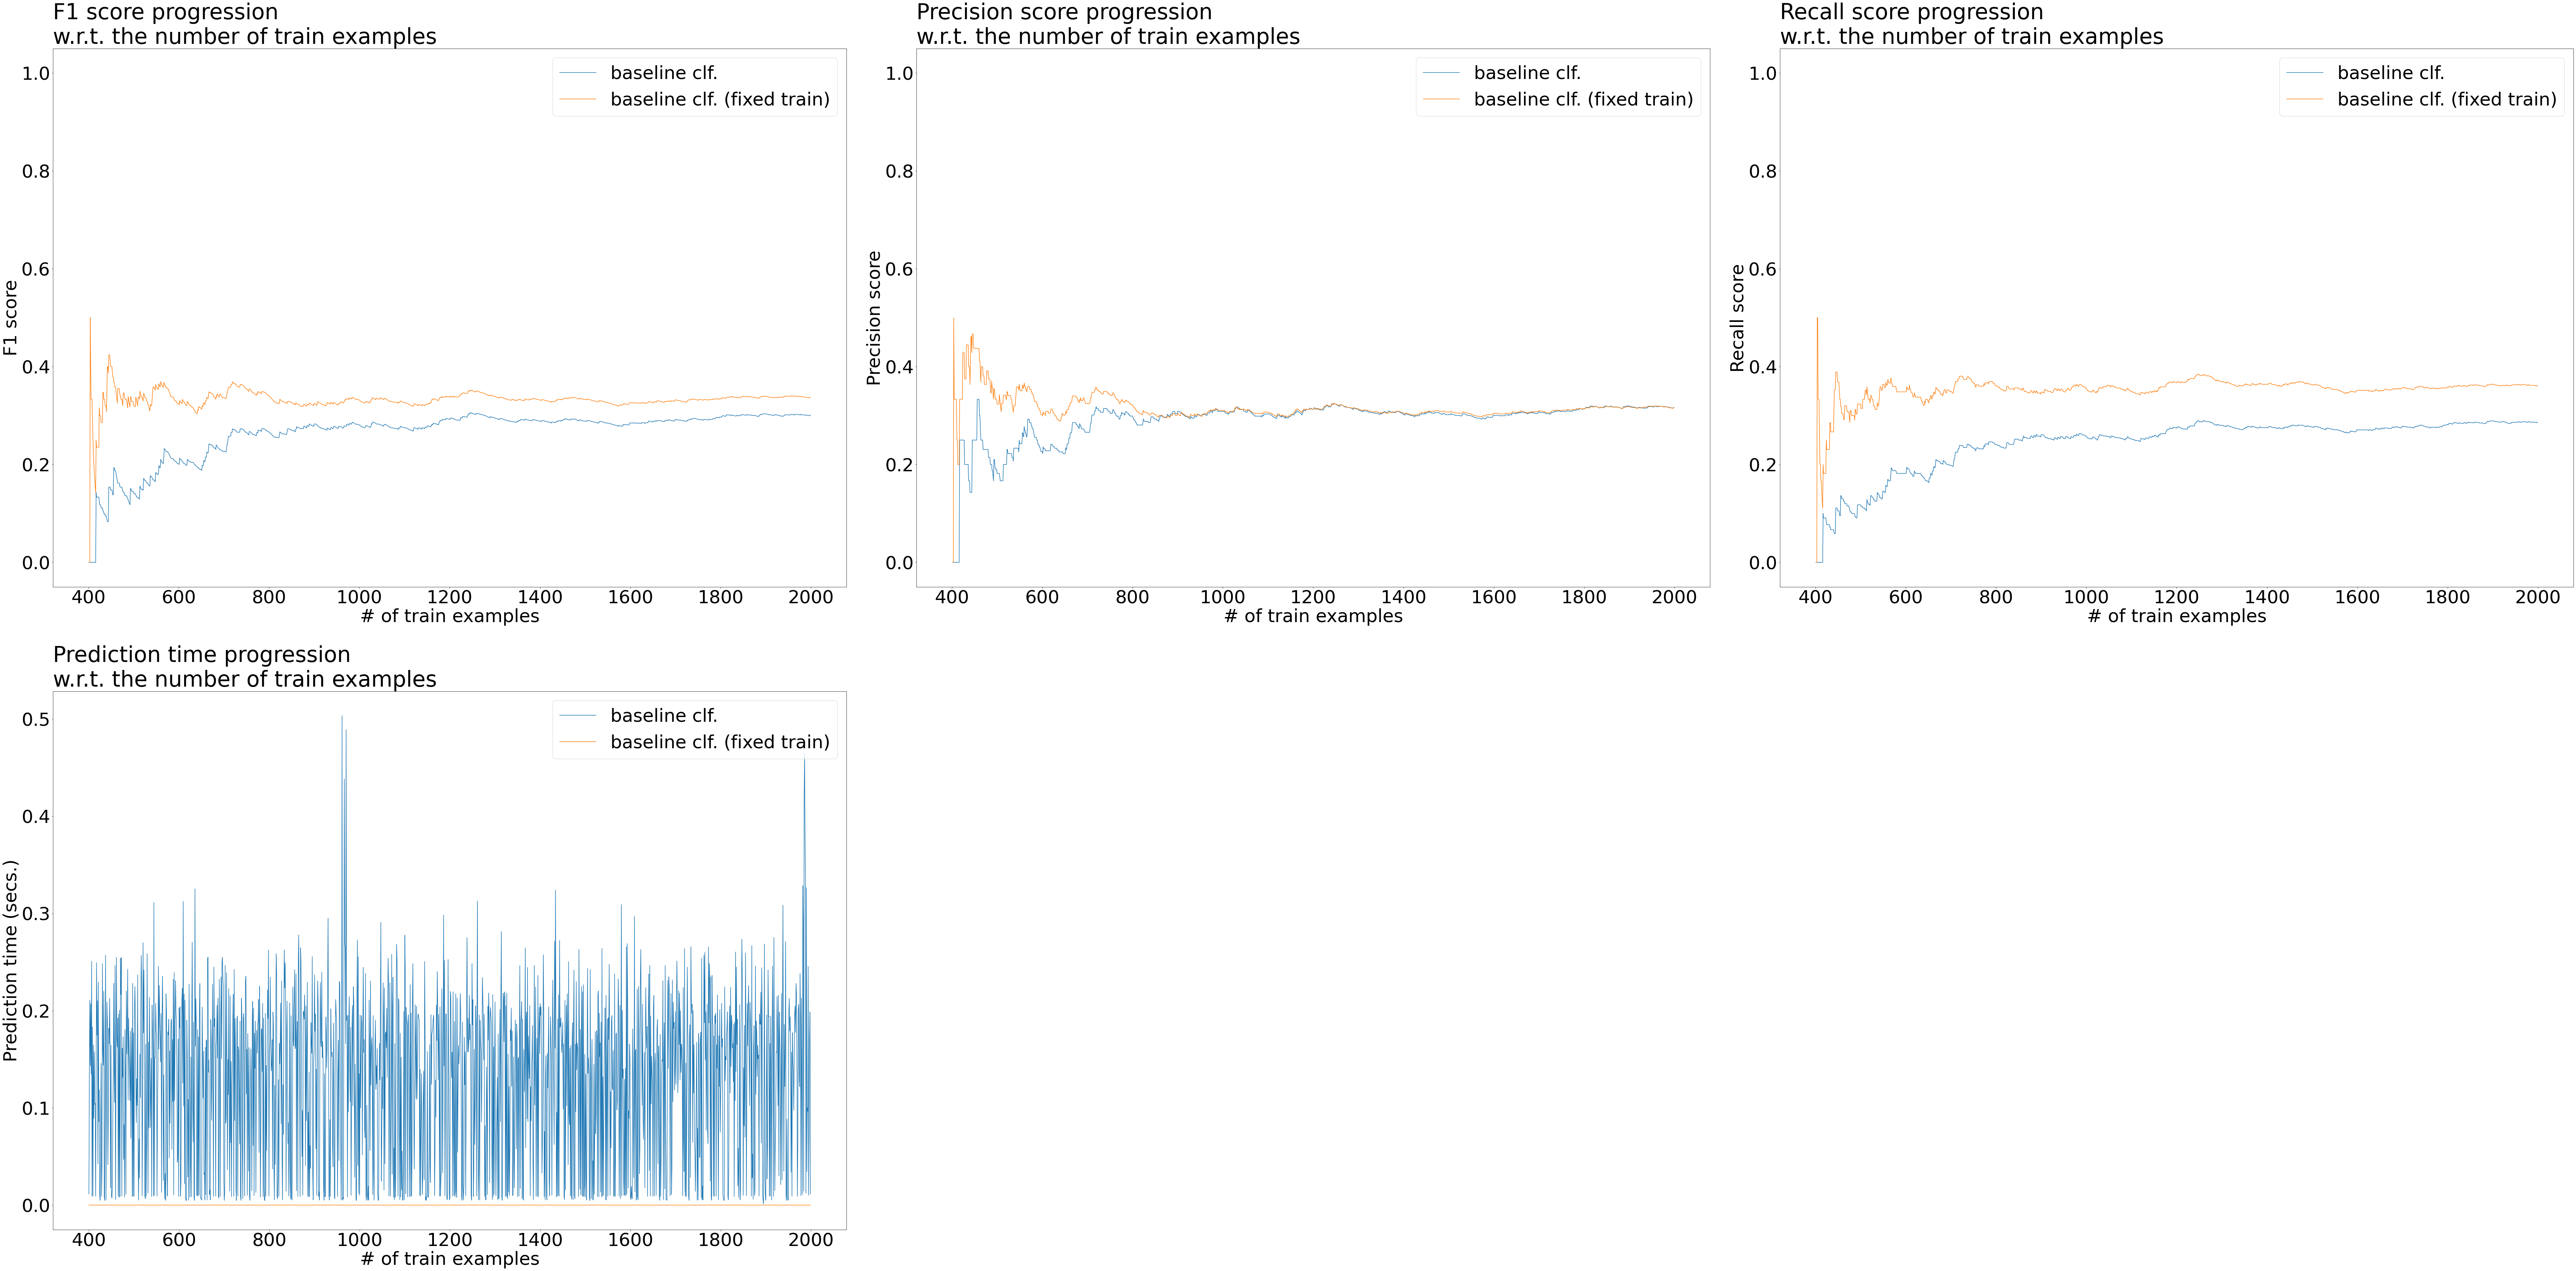

In [256]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1,1,1,1)  # Replace default "transparent" background of the figure with the "white" one  

fig, axs = plt.subplots(2, 3, figsize=(100, 50))

# First two plots are for prediction quality comparison
for ax, t in zip(axs[0],['f1_score', 'precision_score', 'recall_score']):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot(range(n_train+1, len(X)), score_vals[t], label='baseline clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')
    
# The third plot is for prediction speed comparison
axs[1,0].plot(range(n_train, len(X)), t_preds, label='baseline clf.')
axs[1,0].plot(range(n_train, len(X)), t_preds_fixedtrain, label='baseline clf. (fixed train)')

# Add labels and titles to the plots
for (ax, t_verb, dim) in zip(axs.flatten(), ['F1 score', 'Precision score', 'Recall score', 'Prediction time'], ['', '', '','(secs.)']):
    ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left')
    ax.set_xlabel('# of train examples')
    ax.set_ylabel(f"{t_verb} {dim}".strip())
    ax.legend()
    
# Drop the unused subplots
for i in range(1, 3):
  axs[1,i].set_axis_off()    

# Some postprocessing of plots
plt.tight_layout()
plt.subplots_adjust()
plt.rc('font', size=50)  

plt.savefig('Classifier_comparison.png')
plt.show()

All the metrics seem to reach 0.5 at best, which is not a great result. Also it seems that using a constant train size is better for the algorithm. This could be the result of overfitting with too many samples in X_pos or X_neg to consider if the train size is too large. We will leave the train size fixed and try to improve the algorithm in another way.

In [250]:
def predict_micro_average(
        x, X_train, Y_train,
        min_cardinality=10
):
    X_pos = X_train[Y_train]
    X_neg = X_train[~Y_train]

    intersections_pos = x.reshape(1, -1) & X_pos
    intersections_pos = intersections_pos[intersections_pos.sum(axis=1) >= min_cardinality]
    perc_counters_pos = ((intersections_pos @ (~X_neg.T)) == 0).mean(axis=1).mean()

    intersections_neg = x.reshape(1, -1) & X_neg
    intersections_neg = intersections_neg[intersections_neg.sum(axis=1) >= min_cardinality]
    perc_counters_neg = ((intersections_neg @ (~X_pos.T)) == 0).mean(axis=1).mean()

    prediction = perc_counters_pos < perc_counters_neg
    return prediction

There is a problem with the normalization of n_counters_pos and n_counters_neg in the initial algorithm. If, for example, len(X_neg) is much bigger than len(X_pos), then n_counters_pos / len(X_pos) will tend to be larger than n_counters_neg / len(X_neg), since for each of the x's intersections with a positive example there can be more potential counterexamples among X_neg. We will try to fix this issue by aggregating all the counterexamples using micro averaging over all the intersections. This way perc_counters_pos and perc_counters_neg can both only go from 0 to 1 and there is no bias due to class imbalance.

In [251]:
%%time
gen = list(predict_array(X, y, n_train, use_tqdm=True, update_train=False, predict_func=predict_micro_average))
y_preds_fixedtrain_micro, t_preds_fixedtrain_micro = apply_stopwatch(gen)

Predicting step by step:  20%|██        | 400/2000 [00:00<?, ?it/s]<ipython-input-250-65278470004b>:10: RuntimeWarning: Mean of empty slice.
  perc_counters_pos = ((intersections_pos @ (~X_neg.T)) == 0).mean(axis=1).mean()
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-250-65278470004b>:14: RuntimeWarning: Mean of empty slice.
  perc_counters_neg = ((intersections_neg @ (~X_pos.T)) == 0).mean(axis=1).mean()
Predicting step by step: 100%|██████████| 2000/2000 [00:11<00:00, 144.01it/s]

CPU times: user 11 s, sys: 53 ms, total: 11.1 s
Wall time: 11.1 s


In [252]:
from sklearn.metrics import f1_score, precision_score, recall_score

score_vals = {}
for score_f in [f1_score, precision_score, recall_score]:    
    score_name = score_f.__name__ + '_fixedtrain'
    preds = y_preds_fixedtrain
    score_vals[score_name] = [score_f(y[:i], preds[:i], zero_division=0) for i in range(1, len(preds))]

    score_name = score_f.__name__ + '_fixedtrain_micro'
    preds = y_preds_fixedtrain_micro
    score_vals[score_name] = [score_f(y[:i], preds[:i], zero_division=0) for i in range(1, len(preds))]

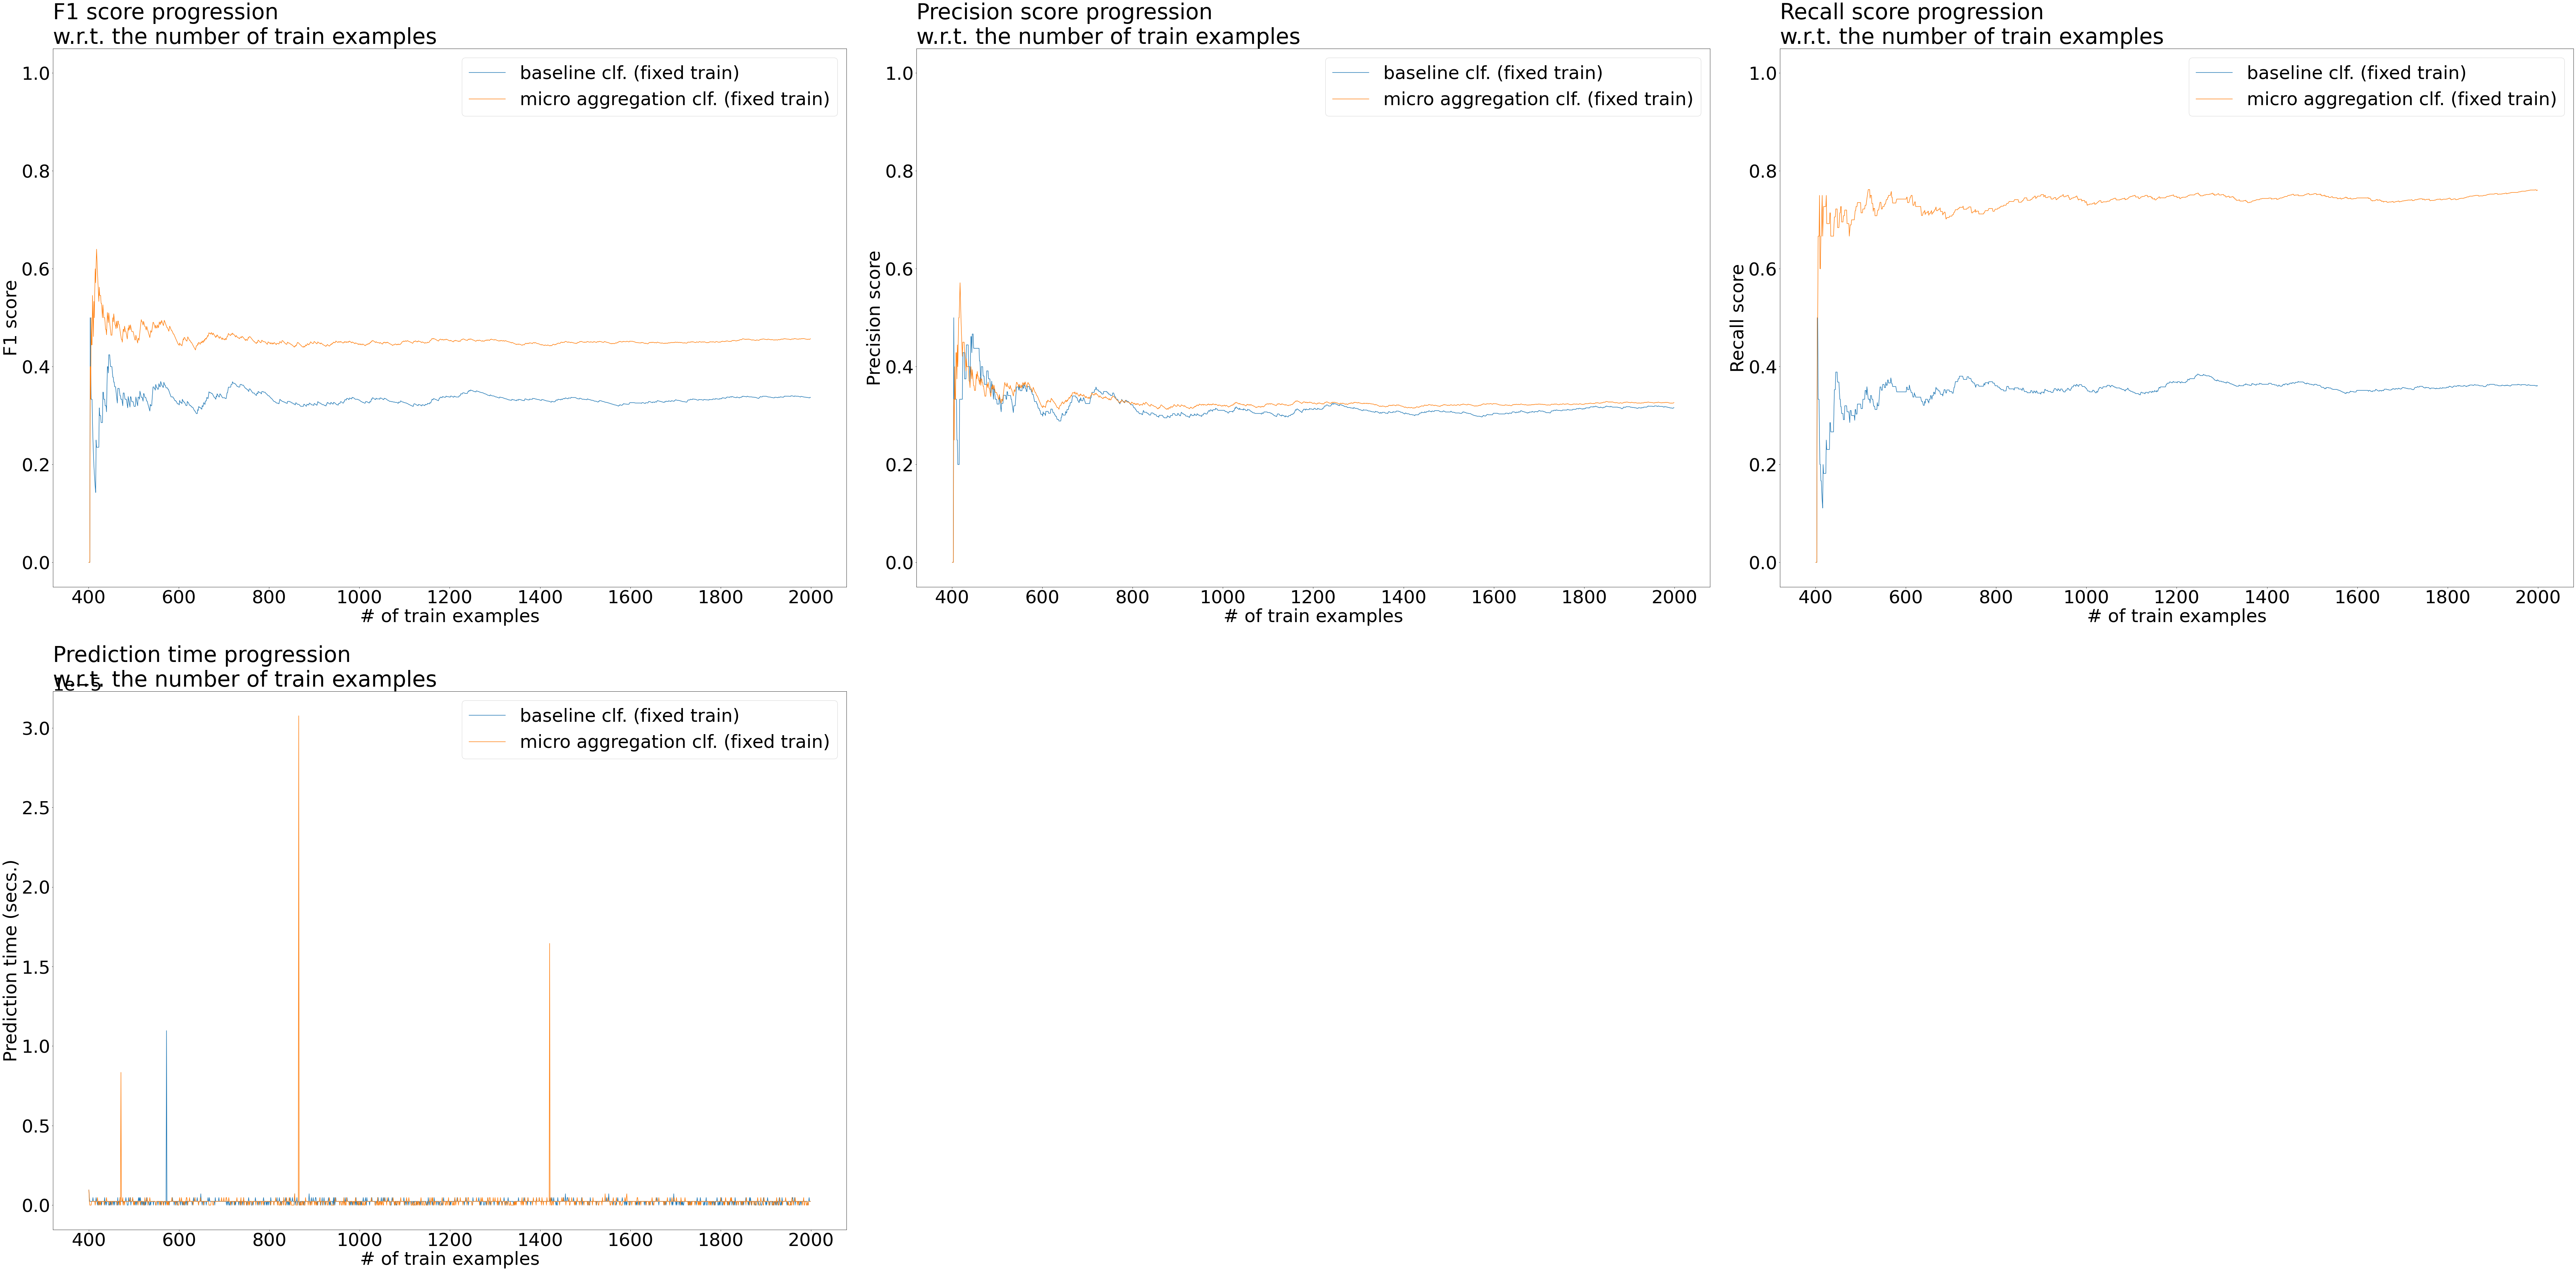

In [253]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1,1,1,1)  # Replace default "transparent" background of the figure with the "white" one  

fig, axs = plt.subplots(2, 3, figsize=(100, 50))

# First two plots are for prediction quality comparison
for ax, t in zip(axs[0],['f1_score', 'precision_score', 'recall_score']):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain_micro'], label='micro aggregation clf. (fixed train)')
    
# The third plot is for prediction speed comparison
axs[1,0].plot(range(n_train, len(X)), t_preds_fixedtrain, label='baseline clf. (fixed train)')
axs[1,0].plot(range(n_train, len(X)), t_preds_fixedtrain_micro, label='micro aggregation clf. (fixed train)')

# Add labels and titles to the plots
for (ax, t_verb, dim) in zip(axs.flatten(), ['F1 score', 'Precision score', 'Recall score', 'Prediction time'], ['', '', '','(secs.)']):
    ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left')
    ax.set_xlabel('# of train examples')
    ax.set_ylabel(f"{t_verb} {dim}".strip())
    ax.legend()
    
# Drop the unused subplots
for i in range(1, 3):
  axs[1,i].set_axis_off()    

# Some postprocessing of plots
plt.tight_layout()
plt.subplots_adjust()
plt.rc('font', size=50)  

plt.savefig('Classifier_comparison_micro.png')
plt.show()

It seems that the new averaging technique has improved the score a lot. Now a lot more of the positive objects are identified correctly.